# Multi-layer perceptron

In this demo, we will train and test a multi-layer perceptron model on the MNIST handwritten digits dataset.

## 1. Load dataset

To load the original MNIST dataset, we can use the [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) method. Since this method will need to download the dataset and load it into memory, it will take a while.

Note that an MNIST image has shape 28 x 28. Here the images have already been flatten to a vector of size 784.

In [ ]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.  # Scale the pixel values to be in [0, 1]

print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


## 2. Split dataset into train/test sets

Traditionally, we use 10,000 examples for the test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10000, random_state=42)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### 3. Define and train an MLP classifier

We will define and train an MLP classifier with one hidden layer that contains 50 neurons and uses logistic activation. This classifier will be trained with SGD (Stochastic Gradient Descent) for 30 epochs. We also set 'verbose=True' to track the training progress.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    activation = 'logistic', 
                    max_iter=30, 
                    verbose=True)

mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.06379805
Iteration 2, loss = 0.40664613
Iteration 3, loss = 0.30092257
Iteration 4, loss = 0.25333768
Iteration 5, loss = 0.22282728
Iteration 6, loss = 0.20088963
Iteration 7, loss = 0.18360226
Iteration 8, loss = 0.16982455
Iteration 9, loss = 0.15813069
Iteration 10, loss = 0.14786916
Iteration 11, loss = 0.13904688
Iteration 12, loss = 0.13084060
Iteration 13, loss = 0.12372506
Iteration 14, loss = 0.11696854
Iteration 15, loss = 0.11137894
Iteration 16, loss = 0.10596401
Iteration 17, loss = 0.10106210
Iteration 18, loss = 0.09625790
Iteration 19, loss = 0.09193460
Iteration 20, loss = 0.08799903
Iteration 21, loss = 0.08424571
Iteration 22, loss = 0.08114879
Iteration 23, loss = 0.07788372
Iteration 24, loss = 0.07456246
Iteration 25, loss = 0.07181968
Iteration 26, loss = 0.06908279
Iteration 27, loss = 0.06666498
Iteration 28, loss = 0.06417095
Iteration 29, loss = 0.06177988
Iteration 30, loss = 0.05950356


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=30,
              verbose=True)

### 4. Evaluate the trained MLP on the test set

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = mlp.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.9659


# Visualizations

## 1. Show a training example and its label

We can reshape an example into a 28 x 28 matrix and plot it using matplotlib.

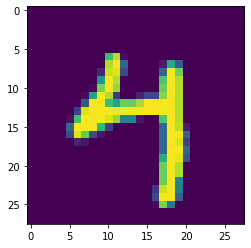

4


In [ ]:
import matplotlib.pyplot as plt

img_id = 10
image = X_train[img_id].reshape((28, 28))
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

## 2. Show a test example and its predicted label

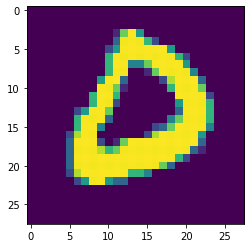

['0']


In [ ]:
img_id = 5
image = X_test[img_id]

# Convert the image into 28 x 28 matrix to plot
plt.imshow(image.reshape((28, 28)))
plt.show()

# Convert the image vector into a matrix 1 x 784 before prediction
predicted_label = mlp.predict(image.reshape((1, 784)))
print(predicted_label)